<ipython-input-1-d882796c8b98>:14: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6541/6541 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - loss: 0.0379 - val_loss: 0.0236 - learning_rate: 0.0100
Epoch 2/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 77s 8ms/step - loss: 0.0234 - val_loss: 0.0183 - learning_rate: 0.0100
Epoch 3/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - loss: 0.0215 - val_loss: 0.0182 - learning_rate: 0.0100
Epoch 4/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - loss: 0.0202 - val_loss: 0.0192 - learning_rate: 0.0100
Epoch 5/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - loss: 0.0175 - val_loss: 0.0159 - learning_rate: 0.0050
Epoch 6/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - loss: 0.0164 - val_loss: 0.0142 - learning_rate: 0.0050
Epoch 7/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - loss: 0.0159 - val_loss: 0.0151 - learning_rate: 0.0050
Epoch 8/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - loss: 0.0153 - val_loss: 0.0139 - learning_rate: 0.0050
Epoch 9/30
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - loss: 0.0150 - val_loss: 0.0131 - learning_rate: 0

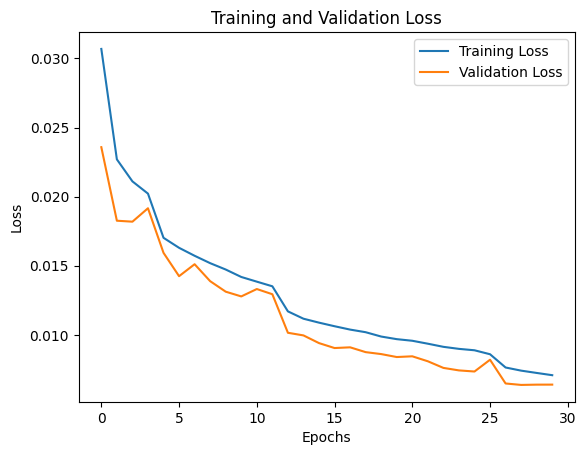

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'home_data.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Data Preprocessing
# Remove unwanted columns
data_cleaned = data.drop(columns=["precipProbability", "precipIntensity", "time", "icon", "summary", "cloudCover"])
data_cleaned = data_cleaned.dropna()  # Remove rows with missing values

# Separate features and target
X = data_cleaned.drop(columns=["Living room [kW]"])
y = data_cleaned["Living room [kW]"]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Callbacks for faster convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))

# Print results
print(f"Mean Absolute Error (MAE): {mae}")

# Optional: Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


<ipython-input-1-379bee4b702d>:14: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 148s 14ms/step - loss: 8.5882e-04 - val_loss: 1.1662e-04 - learning_rate: 0.0100
Epoch 2/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 139s 14ms/step - loss: 1.2103e-04 - val_loss: 1.6129e-04 - learning_rate: 0.0100
Epoch 3/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 139s 14ms/step - loss: 8.8457e-05 - val_loss: 1.6302e-04 - learning_rate: 0.0100
Epoch 4/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 142s 14ms/step - loss: 4.2537e-05 - val_loss: 1.5806e-05 - learning_rate: 0.0050
Epoch 5/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - loss: 3.6153e-05 - val_loss: 2.2709e-05 - learning_rate: 0.0050
Epoch 6/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 139s 14ms/step - loss: 3.3770e-05 - val_loss: 1.3273e-05 - learning_rate: 0.0050
Epoch 7/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - loss: 2.3378e-05 - val_loss: 1.0601e-05 - learning_rate: 0.0025
Epoch 8/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 140s 14ms/step - loss: 2.2541e-05 - val_loss: 1.0062e-05 - learning_rate: 0.0025


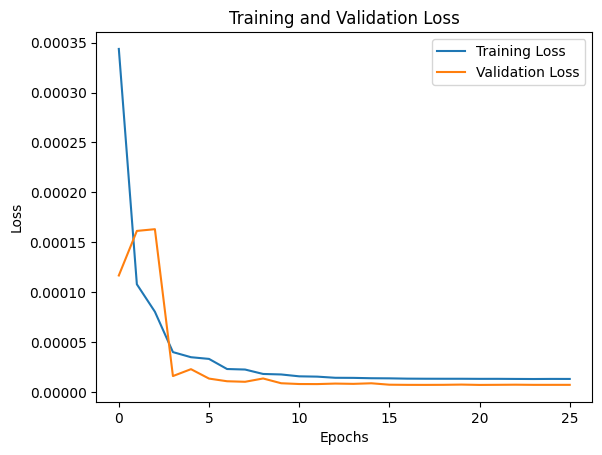

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'home_data.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Data Preprocessing
# Remove unwanted columns
data_cleaned = data.drop(columns=["precipProbability", "precipIntensity", "time", "icon", "summary", "cloudCover"])
data_cleaned = data_cleaned.dropna()  # Remove rows with missing values

# Separate features and target
X = data_cleaned.drop(columns=["gen [kW]"])
y = data_cleaned["gen [kW]"]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Callbacks for faster convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))

# Print results
print(f"Mean Absolute Error (MAE): {mae}")

# Optional: Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


<ipython-input-2-dee77c730e73>:14: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10079/10079 ━━━━━━━━━━━━━━━━━━━━ 155s 15ms/step - loss: 4.1988e-04 - val_loss: 5.7745e-05 - learning_rate: 0.0100
Epoch 2/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 199s 14ms/step - loss: 9.1021e-05 - val_loss: 9.5892e-05 - learning_rate: 0.0100
Epoch 3/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 203s 14ms/step - loss: 5.6703e-05 - val_loss: 7.7119e-05 - learning_rate: 0.0100
Epoch 4/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 198s 14ms/step - loss: 3.0400e-05 - val_loss: 1.1265e-05 - learning_rate: 0.0050
Epoch 5/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 144s 14ms/step - loss: 2.7327e-05 - val_loss: 7.5475e-06 - learning_rate: 0.0050
Epoch 6/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 206s 15ms/step - loss: 1.9318e-05 - val_loss: 2.8594e-06 - learning_rate: 0.0025
Epoch 7/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 201s 14ms/step - loss: 1.8756e-05 - val_loss: 4.5285e-06 - learning_rate: 0.0025
Epoch 8/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 202s 14ms/step - loss: 1.5647e-05 - val_loss: 5.5323e-06 - learning_rate: 0.0012
Epoch 9/30


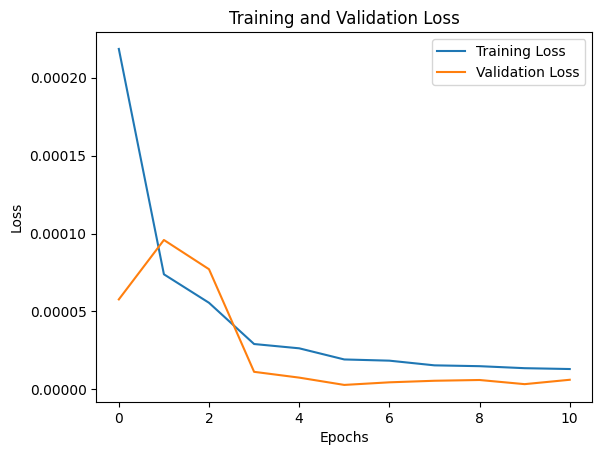

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'home_data.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Data Preprocessing
# Remove unwanted columns
data_cleaned = data.drop(columns=["precipProbability", "precipIntensity", "time", "icon", "summary", "cloudCover"])
data_cleaned = data_cleaned.dropna()  # Remove rows with missing values

# Separate features and target
X = data_cleaned.drop(columns=["House overall [kW]"])
y = data_cleaned["House overall [kW]"]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Callbacks for faster convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))

# Print results
print(f"Mean Absolute Error (MAE): {mae}")

# Optional: Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


<ipython-input-3-6c7598c66c2f>:14: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 150s 14ms/step - loss: 0.0101 - val_loss: 0.0043 - learning_rate: 0.0100
Epoch 2/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 146s 14ms/step - loss: 0.0055 - val_loss: 0.0039 - learning_rate: 0.0100
Epoch 3/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 202s 14ms/step - loss: 0.0050 - val_loss: 0.0034 - learning_rate: 0.0100
Epoch 4/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 201s 14ms/step - loss: 0.0049 - val_loss: 0.0041 - learning_rate: 0.0100
Epoch 5/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 144s 14ms/step - loss: 0.0047 - val_loss: 0.0054 - learning_rate: 0.0100
Epoch 6/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 142s 14ms/step - loss: 0.0039 - val_loss: 0.0035 - learning_rate: 0.0050
Epoch 7/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 203s 14ms/step - loss: 0.0037 - val_loss: 0.0033 - learning_rate: 0.0050
Epoch 8/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 196s 14ms/step - loss: 0.0034 - val_loss: 0.0033 - learning_rate: 0.0025
Epoch 9/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - los

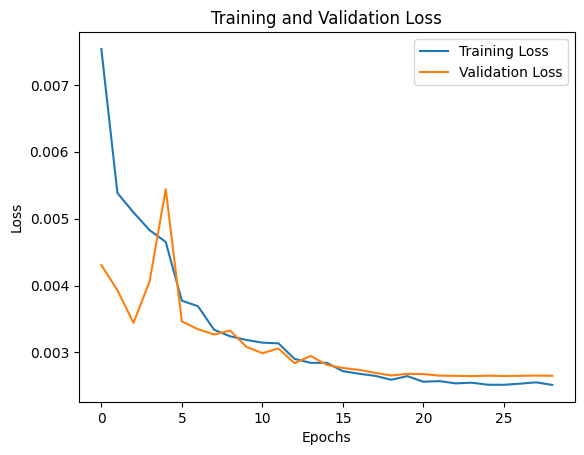

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'home_data.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Data Preprocessing
# Remove unwanted columns
data_cleaned = data.drop(columns=["precipProbability", "precipIntensity", "time", "icon", "summary", "cloudCover"])
data_cleaned = data_cleaned.dropna()  # Remove rows with missing values

# Separate features and target
X = data_cleaned.drop(columns=["Dishwasher [kW]"])
y = data_cleaned["Dishwasher [kW]"]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Callbacks for faster convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))

# Print results
print(f"Mean Absolute Error (MAE): {mae}")

# Optional: Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


<ipython-input-4-d68932d7423a>:14: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10079/10079 ━━━━━━━━━━━━━━━━━━━━ 149s 14ms/step - loss: 4.1661e-04 - val_loss: 3.4780e-04 - learning_rate: 0.0100
Epoch 2/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 147s 15ms/step - loss: 3.7568e-04 - val_loss: 3.3354e-04 - learning_rate: 0.0100
Epoch 3/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 146s 14ms/step - loss: 3.7012e-04 - val_loss: 3.2784e-04 - learning_rate: 0.0100
Epoch 4/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 200s 14ms/step - loss: 3.5029e-04 - val_loss: 3.2899e-04 - learning_rate: 0.0050
Epoch 5/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 149s 15ms/step - loss: 3.8919e-04 - val_loss: 3.2725e-04 - learning_rate: 0.0050
Epoch 6/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 198s 14ms/step - loss: 3.6692e-04 - val_loss: 3.4116e-04 - learning_rate: 0.0025
Epoch 7/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 198s 14ms/step - loss: 3.6232e-04 - val_loss: 3.3084e-04 - learning_rate: 0.0025
Epoch 8/30
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - loss: 3.6070e-04 - val_loss: 3.2894e-04 - learning_rate: 0.0012
Epoch 9/30


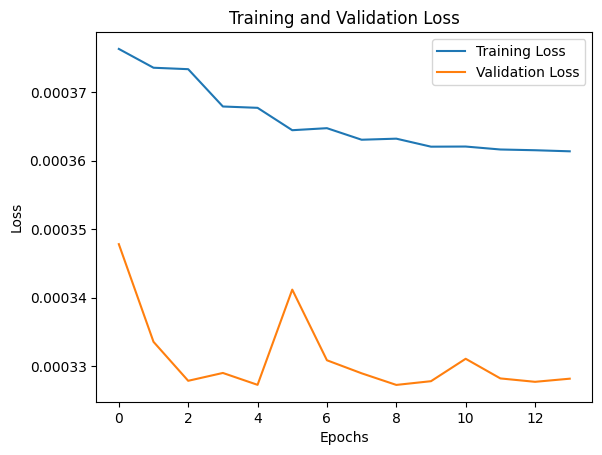

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'home_data.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Data Preprocessing
# Remove unwanted columns
data_cleaned = data.drop(columns=["precipProbability", "precipIntensity", "time", "icon", "summary", "cloudCover"])
data_cleaned = data_cleaned.dropna()  # Remove rows with missing values

# Separate features and target
X = data_cleaned.drop(columns=["Kitchen 12 [kW]"])
y = data_cleaned["Kitchen 12 [kW]"]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Callbacks for faster convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))

# Print results
print(f"Mean Absolute Error (MAE): {mae}")

# Optional: Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()
